In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical

In [9]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# Split the training data into training and validation sets
val_split = 0.1
val_samples = int(val_split * x_train.shape[0])
x_val = x_train[:val_samples]
y_val = y_train[:val_samples]
x_train = x_train[val_samples:]
y_train = y_train[val_samples:]

In [11]:
# Define CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [12]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/5
844/844 [==============================] - 47s 54ms/step - loss: 0.2073 - accuracy: 0.9363 - val_loss: 0.0644 - val_accuracy: 0.9820
Epoch 2/5
844/844 [==============================] - 40s 48ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0546 - val_accuracy: 0.9843
Epoch 3/5
844/844 [==============================] - 42s 50ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0555 - val_accuracy: 0.9852
Epoch 4/5
844/844 [==============================] - 41s 48ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0443 - val_accuracy: 0.9860
Epoch 5/5
844/844 [==============================] - 40s 48ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0403 - val_accuracy: 0.9887


In [14]:
# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(x_val, y_val)
print('\nValidation accuracy:', val_acc)

188/188 [==============================] - 2s 12ms/step - loss: 0.0403 - accuracy: 0.9887

Validation accuracy: 0.9886666536331177


In [16]:
# Make predictions on validation data
val_predictions = model.predict(x_val)
val_predicted_labels = np.argmax(val_predictions, axis=1)

188/188 [==============================] - 2s 8ms/step


In [17]:
# Calculate confusion matrix for validation predictions
val_confusion_mtx = confusion_matrix(np.argmax(y_val, axis=1), val_predicted_labels)

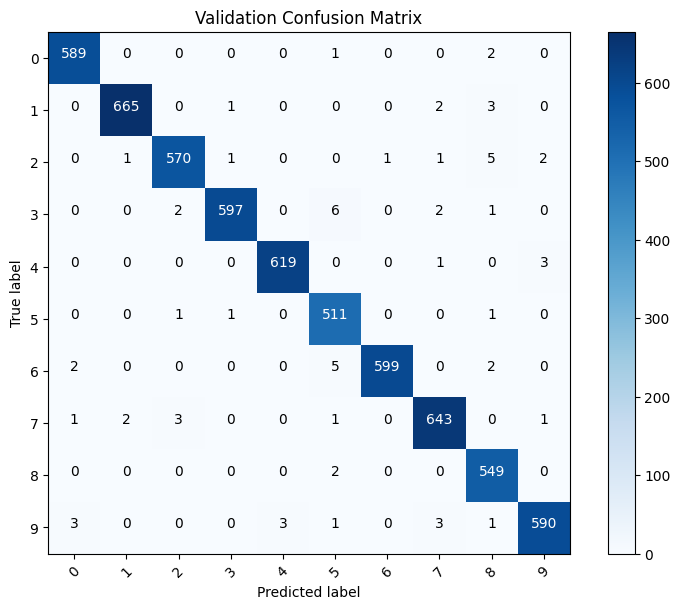

In [18]:
# Plot confusion matrix for validation data
plt.figure(figsize=(8, 6))
plot_confusion_matrix(val_confusion_mtx, classes=range(10), title='Validation Confusion Matrix')
plt.show()

In [19]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0298 - accuracy: 0.9902

Test accuracy: 0.9901999831199646


In [20]:
# Make predictions on test data
test_predictions = model.predict(x_test)
test_predicted_labels = np.argmax(test_predictions, axis=1)

313/313 [==============================] - 2s 8ms/step


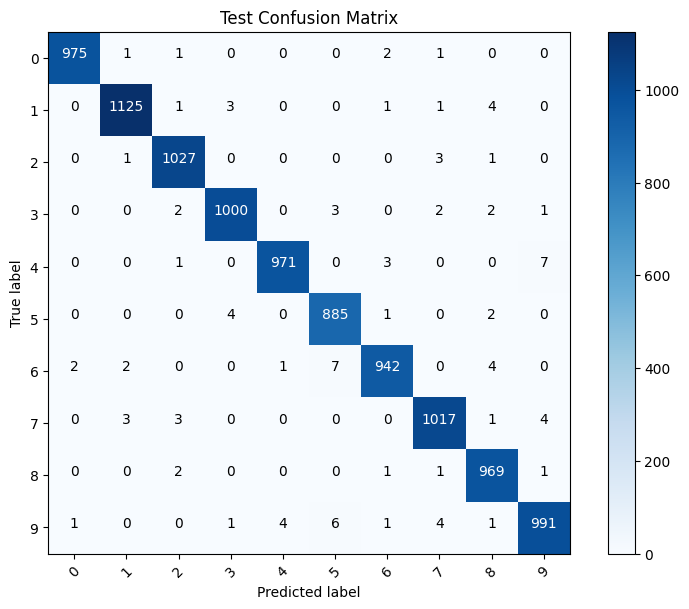

In [21]:
# Calculate confusion matrix for test predictions
test_confusion_mtx = confusion_matrix(np.argmax(y_test, axis=1), test_predicted_labels)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
plot_confusion_matrix(test_confusion_mtx, classes=range(10), title='Test Confusion Matrix')
plt.show()

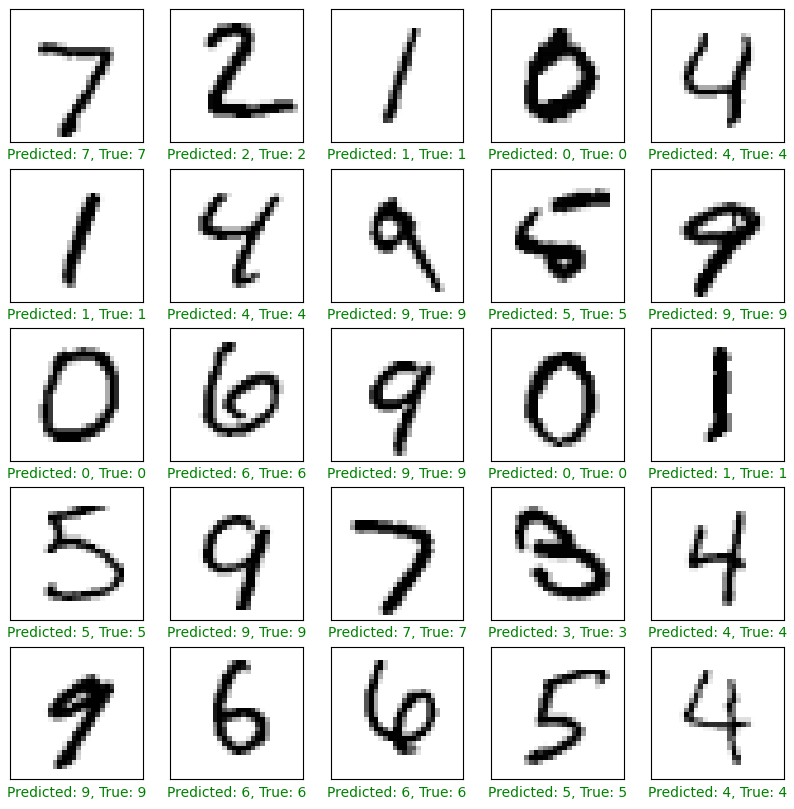

In [22]:
# Display random test images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(test_predictions[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}", color=color)
plt.show()